# Exercise 9

The following is the analysis of the results of the genetic algorithm code


In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
"""
The following function is used to read the output file from the genetic algorithm simulation in order to obtain the data from it such as the distance and the coordinates (in order beginning to end) of the best path
"""
def read_data_from_file(filename):
    data = []
    with open(filename, 'r') as file:
        block = {}
        for line in file:
            line = line.strip()
            if line.startswith('Generation'):
                if block:
                    data.append(block)
                gen_num = int(line.split()[-1])
                block = {'gen_num': gen_num}
            elif line.startswith('Best distance:'):
                gen_dist = float(line.split()[-1])
                block['gen_dist'] = gen_dist
            elif line.startswith('Best path:'):
                path = []
                for path_line in file:
                    path_line = path_line.strip()
                    if not path_line:
                        break
                    x, y = map(float, path_line.split())
                    path.append((x, y))
                block['path'] = path
    if block:
        data.append(block)
    return data

First we use the function defined above to read the output file from the simulation

In [66]:
fname_sq = '../../src/lab9/paths_square.txt'
data_sq = read_data_from_file(fname_sq)

fname_ci = '../../src/lab9/paths_circle.txt'
data_ci = read_data_from_file(fname_ci)

After reading the two different sets of outputs we plot the best paths of each generation (every M generations as set in the input file) and save the results in a folder to check the evolution, furthermore the final path is saved to be displayed with the distance evolution later

In [70]:
for i in range(len(data_sq)):
    x_p = []
    y_p = []
    for x, y in data_sq[i]['path']:
        x_p.append(x)
        y_p.append(y)
    plt.figure(figsize=(5,5))
    plt.scatter(x_p[0], y_p[0])
    plt.plot(x_p, y_p)
    plt.title("Generation {}".format(data_sq[i]["gen_num"]))
    fname = "./fig/square/path_{}.png".format(i)
    plt.savefig(fname)
    plt.close()

x_sq = x_p
y_sq = y_p

for i in range(len(data_ci)):
    x_p = []
    y_p = []
    for x, y in data_ci[i]['path']:
        x_p.append(x)
        y_p.append(y)
    
    plt.figure(figsize=(5,5))
    plt.plot(x_p, y_p)
    plt.scatter(x_p[0], y_p[0])
    plt.title("Generation {}".format(data_sq[i]["gen_num"]))
    fname = "./fig/circle/path{}.png".format(i)
    plt.savefig(fname)
    plt.close()


x_ci = x_p
y_ci = y_p


The distance is read from a separate file and a plot with the final best path and the change in the best path distance is displayed

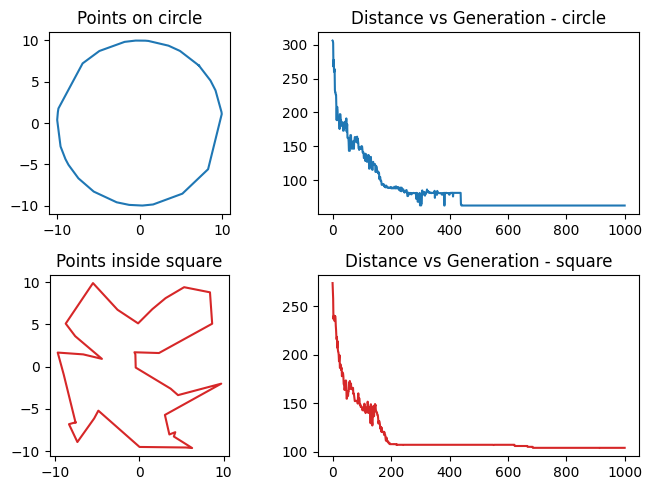

In [81]:
dist_sq = np.loadtxt("../../src/lab9/distance_sq.txt")
dist_ci = np.loadtxt("../../src/lab9/distance_ci.txt")

fig, axs = plt.subplots(2, 2, figsize=(7,5))
axs[0, 0].plot(x_ci, y_ci, 'tab:blue')
axs[0, 0].set_aspect("equal")
axs[0, 0].set_title('Points on circle')
axs[0, 1].plot(dist_ci, 'tab:blue')
axs[0, 1].set_title('Distance vs Generation - circle')
axs[1, 0].plot(x_sq, y_sq, 'tab:red')
axs[1, 0].set_aspect("equal")

axs[1, 0].set_title('Points inside square')
axs[1, 1].plot(dist_sq, 'tab:red')
axs[1, 1].set_title('Distance vs Generation - square')
fig.tight_layout()

The code is also tested on the american capitals file, first a simple plot as above is produced, then, using the plotly library, a plot of the paths superimposed over the map of the United States is created.

In [128]:
fname_us = '../../src/lab9/paths_usa.txt'
data_us = read_data_from_file(fname_us)

In [105]:
for i in range(len(data_us)):
    x_p = []
    y_p = []
    for x, y in data_us[i]['path']:
        x_p.append(x)
        y_p.append(y)
    
    plt.figure(figsize=(5,5))
    plt.plot(x_p, y_p)
    plt.scatter(x_p[0], y_p[0])
    plt.title("Generation {}".format(data_sq[i]["gen_num"]))
    fname = "./fig/usa/plain/path{}.png".format(i)
    plt.savefig(fname)
    plt.close()


x_us = x_p
y_us = y_p

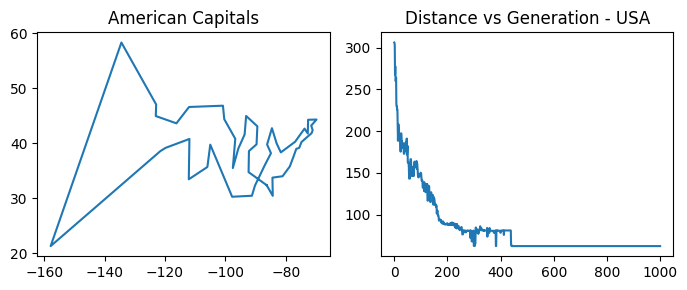

In [122]:
fig, axs = plt.subplots(1,2, figsize=(7,3))
axs[0].plot(x_us, y_us, 'tab:blue')
axs[0].set_title('American Capitals')
axs[1].plot(dist_ci, 'tab:blue')
axs[1].set_title('Distance vs Generation - USA')
fig.tight_layout()

Next the path with the maps. In order to run the following piece of code the following packages are required: plotly for the maps and kaleido for saving the results as a file, the required packages can be installed with pip:

pip install plotly kaleido

In case this is not viable the outputs are in the "./fig/usa/maps/" folder. A gif animation of the evolution is shown below

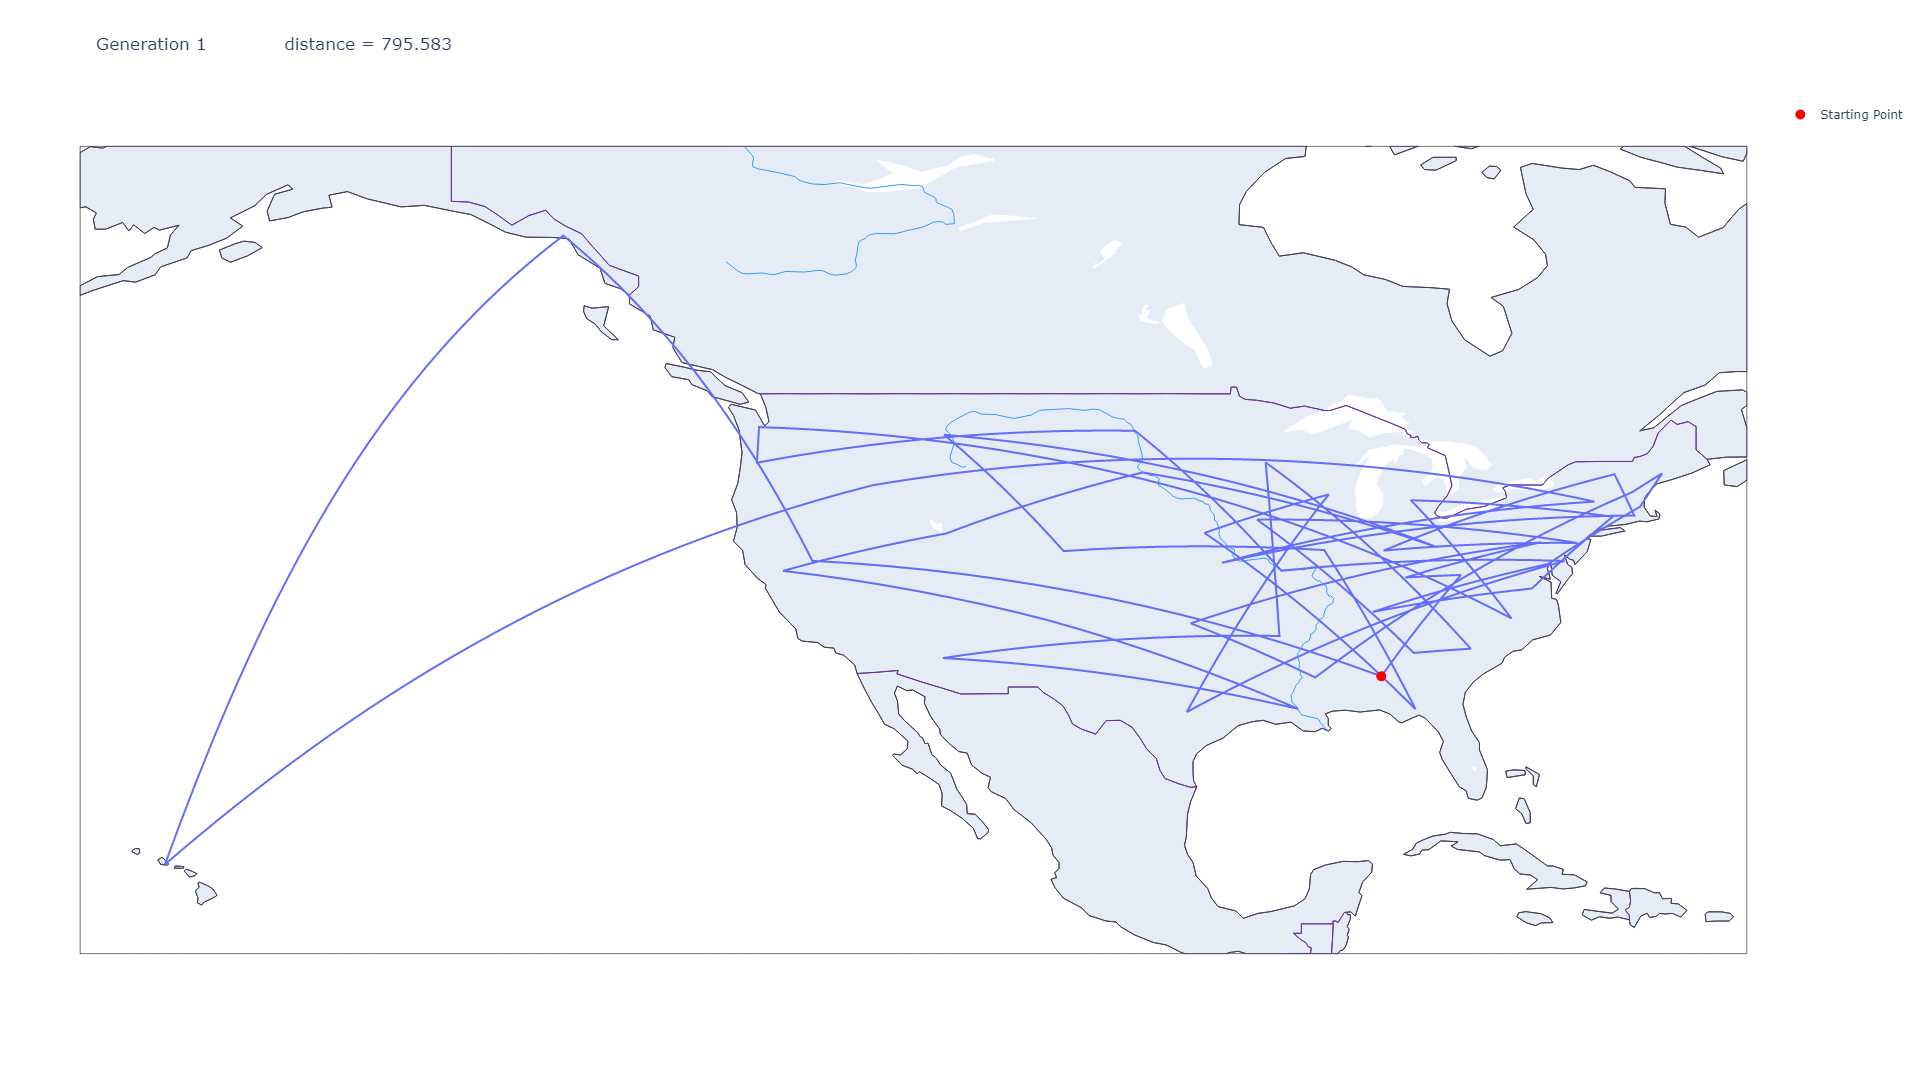

In [1]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

for i in range(len(data_us)):
    x_p = []
    y_p = []
    for x, y in data_us[i]['path']:
        x_p.append(x)
        y_p.append(y)
        
    fig = px.line_geo(
        lat=y_p,
        lon=x_p,
        title="Generation {} {} distance = {}".format(data_us[i]["gen_num"], "\t\t", data_us[i]["gen_dist"]).expandtabs(),
  
    )

    fig.update_geos(
        resolution=110,
        
        showcoastlines=True, 
        showrivers=True,
        showlakes=True,
        showcountries=True, countrycolor="RebeccaPurple",
        showsubunits=True,
        subunitcolor="Blue",
        lataxis_range=[min(y_p) - 5, max(y_p) + 5],
        lonaxis_range=[min(x_p) - 5, max(x_p) + 5],
    )
    fig.add_trace(go.Scattergeo(
        lat=[y_p[0]],
        lon=[x_p[0]],
        mode='markers',
        marker=dict(size=10, color='red', symbol='circle'),
        name='Starting Point'
    ))
    
    num = str(i)

    num = num.zfill(3)
    fname = "./fig/usa/map/map_number_{}.png".format(num)
    pio.write_image(fig, fname, width=1920, height=1080)


NameError: name 'data_us' is not defined